<a href="https://colab.research.google.com/github/ShahriarJawwad/Machine-Learning-Project-01/blob/main/Machine_Learning_Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/depression_data.csv')

# Display the first 5 rows
df.head()


,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3.0,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0.0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [4]:
# Check for missing values
df.isnull().sum()



,0
Name,0
Age,0
Marital Status,0
Education Level,0
Number of Children,1
Smoking Status,1
Physical Activity Level,1
Employment Status,1
Income,1
Alcohol Consumption,1


In [5]:
df.drop(columns=['Name'], inplace=True)


In [6]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = [
    'Marital Status', 'Education Level', 'Smoking Status',
    'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
    'Dietary Habits', 'Sleep Patterns', 'History of Substance Abuse',
    'Family History of Depression', 'Chronic Medical Conditions'
]

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Encode Target Variable (History of Mental Illness)
df['History of Mental Illness'] = df['History of Mental Illness'].map({'Yes': 1, 'No': 0})


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Income', 'Number of Children']] = scaler.fit_transform(df[['Age', 'Income', 'Number of Children']])


In [8]:
from sklearn.model_selection import train_test_split

# Features and Target Variable
X = df.drop(columns=['History of Mental Illness'])  # Features
y = df['History of Mental Illness']  # Target variable

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/depression_data.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Drop the 'Name' column
df.drop(columns=['Name'], inplace=True)

# Columns to encode
categorical_cols = [
    'Marital Status', 'Education Level', 'Smoking Status',
    'Physical Activity Level', 'Employment Status', 'Alcohol Consumption',
    'Dietary Habits', 'Sleep Patterns', 'History of Substance Abuse',
    'Family History of Depression', 'Chronic Medical Conditions'
]

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Encode Target Variable
df['History of Mental Illness'] = df['History of Mental Illness'].map({'Yes': 1, 'No': 0})

# Handle missing values BEFORE scaling
# For numerical columns
numerical_cols = ['Age', 'Income', 'Number of Children']
imputer = SimpleImputer(strategy='mean')  # You can change to 'median' if preferred
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Features and Target Variable
X = df.drop(columns=['History of Mental Illness'])  # Features
y = df['History of Mental Illness']  # Target variable

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify no NaN values remain
print("\nMissing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in y_test:", y_test.isnull().sum())

# Train the model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Evaluate the model
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

First 5 rows of the dataset:
               Name  Age Marital Status    Education Level  \
0  Christine Barker   31        Married  Bachelor's Degree   
1  Jacqueline Lewis   55        Married        High School   
2    Shannon Church   78        Widowed    Master's Degree   
3    Charles Jordan   58       Divorced    Master's Degree   
4      Michael Rich   18         Single        High School   

   Number of Children Smoking Status Physical Activity Level  \
0                   2     Non-smoker                  Active   
1                   1     Non-smoker               Sedentary   
2                   1     Non-smoker               Sedentary   
3                   3     Non-smoker                Moderate   
4                   0     Non-smoker               Sedentary   

  Employment Status     Income Alcohol Consumption Dietary Habits  \
0        Unemployed   26265.67            Moderate       Moderate   
1          Employed   42710.36                High      Unhealthy   
2     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.664294173091331
              precision    recall  f1-score   support

           0       0.70      0.90      0.79     57471
           1       0.36      0.13      0.19     25283

    accuracy                           0.66     82754
   macro avg       0.53      0.51      0.49     82754
weighted avg       0.60      0.66      0.60     82754



In [14]:
from xgboost import XGBClassifier

# Train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:56:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
Accuracy: 0.6931749522681683
              precision    recall  f1-score   support

           0       0.70      0.99      0.82     57471
           1       0.39      0.01      0.02     25283

    accuracy                           0.69     82754
   macro avg       0.54      0.50      0.42     82754
weighted avg       0.60      0.69      0.57     82754



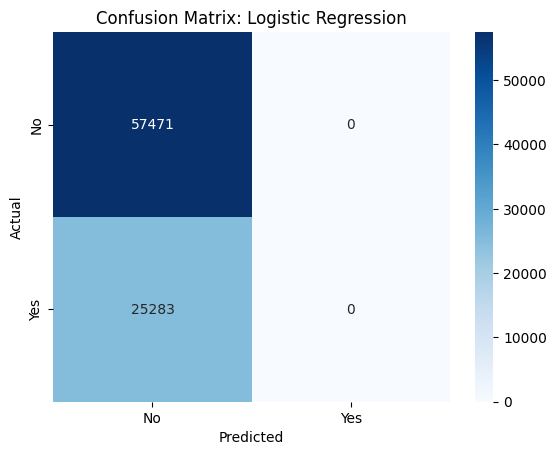

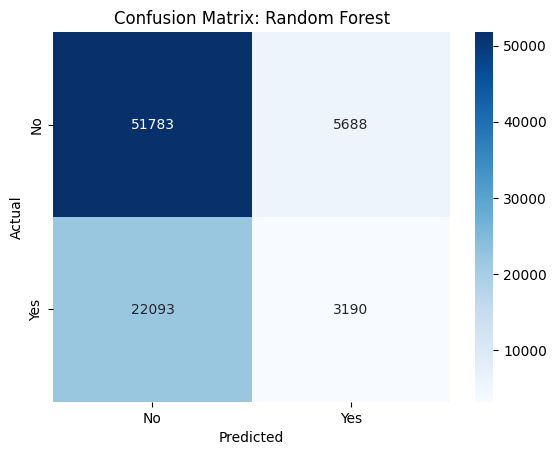

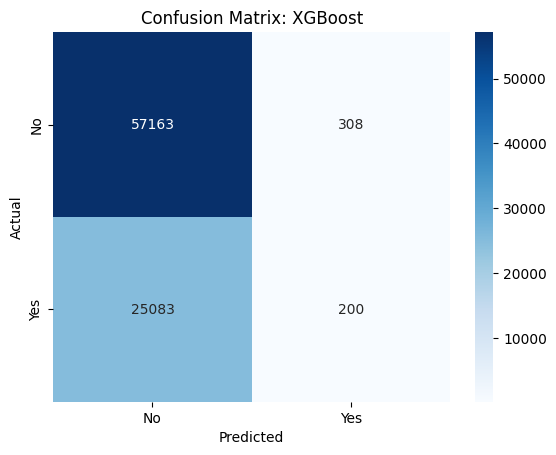

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# Plot Confusion Matrices
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples per leaf
    'bootstrap': [True, False]  # Use bootstrapping or not
}

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # Number of random combinations
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    verbose=2
)

# Fit the model
random_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Drop weak features (based on feature importance)
features_to_drop = ['History of Substance Abuse', 'Chronic Medical Conditions',
                    'Marital Status', 'Physical Activity Level', 'Alcohol Consumption']
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

# Apply SMOTE on the reduced training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reduced, y_train)

# Train Random Forest on resampled data
final_model = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=10,
    random_state=42,
    class_weight='balanced',  # Helps with imbalance

)

final_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_smote = final_model.predict(X_test_reduced)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))


Accuracy: 0.588805374966769
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.62      0.68     57471
           1       0.38      0.53      0.44     25283

    accuracy                           0.59     82754
   macro avg       0.56      0.57      0.56     82754
weighted avg       0.63      0.59      0.60     82754

Confusion Matrix:
 [[35420 22051]
 [11977 13306]]


In [18]:
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Apply SMOTETomek for better class balancing
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_reduced, y_train)

# Train XGBoost (optimized for imbalance)
xgb_model = XGBClassifier(
    n_estimators=500,  # More trees for better learning
    learning_rate=0.02,  # Slower learning for better generalization
    max_depth=10,  # Prevents overfitting
    min_child_weight=3,  # Reduces complexity
    gamma=0.3,  # Controls tree pruning
    subsample=0.75,  # Randomly samples data to prevent overfitting
    colsample_bytree=0.8,  # Randomly selects features per tree
    scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1]),  # Handles class imbalance
    reg_lambda=2,  # L2 regularization for better generalization
    reg_alpha=0.5,  # L1 regularization for feature selection
    random_state=42
)

xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test_reduced)

# Evaluate
print("🔥 Improved Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("🔥 Improved Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("🔥 Improved Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


🔥 Improved Accuracy: 0.6039224690045194
🔥 Improved Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.66      0.70     57471
           1       0.38      0.47      0.42     25283

    accuracy                           0.60     82754
   macro avg       0.56      0.57      0.56     82754
weighted avg       0.63      0.60      0.61     82754

🔥 Improved Confusion Matrix:
 [[38129 19342]
 [13435 11848]]


In [19]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.7 MB/s eta 0:00:00


[I 2025-03-06 17:03:21,107] A new study created in memory with name: no-name-3cfdf5d9-1fce-49d2-a443-da786c9e8912
[I 2025-03-06 17:04:06,050] Trial 0 finished with value: 0.6107015975058607 and parameters: {'n_estimators': 784, 'learning_rate': 0.15457034716103704, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 0.9085178389577719, 'subsample': 0.5852874406472783, 'colsample_bytree': 0.515534132782732, 'reg_alpha': 0.08411807066407528, 'reg_lambda': 1.7464548560122415}. Best is trial 0 with value: 0.6107015975058607.
[I 2025-03-06 17:04:33,076] Trial 1 finished with value: 0.603173260507045 and parameters: {'n_estimators': 349, 'learning_rate': 0.031573595330318546, 'max_depth': 16, 'min_child_weight': 2, 'gamma': 0.8181741035795186, 'subsample': 0.6158692444866789, 'colsample_bytree': 0.6496898380948914, 'reg_alpha': 0.9920868516557002, 'reg_lambda': 2.146117802689914}. Best is trial 0 with value: 0.6107015975058607.
[I 2025-03-06 17:04:53,188] Trial 2 finished with value: 0.608804408

🔥 Best Hyperparameters: {'n_estimators': 669, 'learning_rate': 0.0765679192634123, 'max_depth': 4, 'min_child_weight': 1, 'gamma': 0.7572449426664231, 'subsample': 0.926532259845637, 'colsample_bytree': 0.8744023598523494, 'reg_alpha': 0.930560404578409, 'reg_lambda': 2.5712335959741077}
🔥 Final Tuned XGBoost Accuracy: 0.6111728738187883
🔥 Final Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71     57471
           1       0.38      0.45      0.42     25283

    accuracy                           0.61     82754
   macro avg       0.56      0.57      0.56     82754
weighted avg       0.63      0.61      0.62     82754



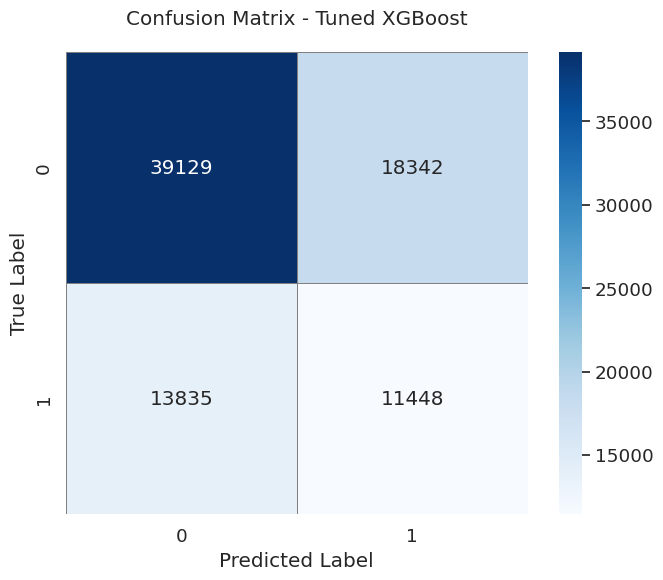

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Confusion matrix heatmap saved and downloading from: /content/confusion_matrix_heatmap.png


In [20]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 800),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 15),
        'gamma': trial.suggest_float('gamma', 0, 1),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1, 5),
        'scale_pos_weight': len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])
    }

    model = XGBClassifier(**params, random_state=42)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_reduced)

    return accuracy_score(y_test, y_pred)

# Run hyperparameter optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best parameters
best_params = study.best_params
print("🔥 Best Hyperparameters:", best_params)

# Train final XGBoost model with best params
final_xgb = XGBClassifier(**best_params, random_state=42)
final_xgb.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_final = final_xgb.predict(X_test_reduced)

# Evaluate the final tuned model
print("🔥 Final Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_final))
print("🔥 Final Classification Report:\n", classification_report(y_test, y_pred_final))

# Create confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            square=True,
            linewidths=0.5,
            linecolor='gray')

plt.title('Confusion Matrix - Tuned XGBoost', pad=20)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Save and download the plot
output_path = '/content/confusion_matrix_heatmap.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()
files.download(output_path)
print(f"✅ Confusion matrix heatmap saved and downloading from: {output_path}")

plt.close()